In [ ]:
import cv2
import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train  = x_train/255
x_test = x_test/255
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
num_classes = 10


In [ ]:
inputImg = layers.Input(shape=(28,28,1),name="inputLayer",dtype="float")

x=layers.Conv2D(16,(3,3),activation="relu",padding="same")(inputImg)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(8,(3,3),activation="relu",padding="same")(x)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Flatten()(x)
x=layers.Dense(64,activation="relu")(x)
x=layers.Dropout(0.3)(x)
x=layers.Dense(128,activation="relu")(x)
x=layers.Dropout(0.3)(x)
encoded = layers.Dense(64,activation="sigmoid")(x)
x=layers.Dense(128,activation="relu")(encoded)
x=layers.Dropout(0.3)(x)
x=layers.Dense(64,activation="relu")(x)
x=layers.Dropout(0.3)(x)

x=layers.Dense(392,activation="relu")(x)

x=layers.Reshape((7,7,8))(x)
x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.BatchNormalization()(x)

out=layers.Conv2D(1,(3,3),activation="sigmoid",padding="same")(x)

model = keras.Model(inputImg,out)
model.compile(loss="mean_absolute_error",optimizer="adam")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 16)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 32)         0     

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("model-{epoch:03d}-{loss}-{val_loss}.h5",save_best_only=True)
model.fit(x_train,x_train,epochs=20,batch_size=20,validation_split=0.1,callbacks=[checkpoint])

Epoch 1/20
2700/2700 [==============================] - 36s 9ms/step - loss: 0.1010 - val_loss: 0.0754
Epoch 2/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0818 - val_loss: 0.0692
Epoch 3/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0784 - val_loss: 0.0662
Epoch 4/20
2700/2700 [==============================] - 26s 9ms/step - loss: 0.0763 - val_loss: 0.0648
Epoch 5/20
2700/2700 [==============================] - 25s 9ms/step - loss: 0.0750 - val_loss: 0.0633
Epoch 6/20
2700/2700 [==============================] - 25s 9ms/step - loss: 0.0738 - val_loss: 0.0617
Epoch 7/20
2700/2700 [==============================] - 26s 9ms/step - loss: 0.0730 - val_loss: 0.0613
Epoch 8/20
2700/2700 [==============================] - 25s 9ms/step - loss: 0.0722 - val_loss: 0.0609
Epoch 9/20
2700/2700 [==============================] - 25s 9ms/step - loss: 0.0715 - val_loss: 0.0598
Epoch 10/20
2700/2700 [==============================] - 26s 10ms/step 

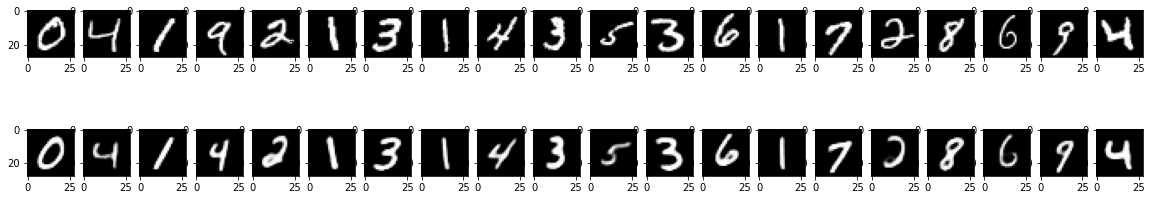

In [ ]:
decodedImages = model.predict(x_train)
n=20
plt.figure(figsize=(20,4))
for i in range(1,n+1):
  ax = plt.subplot(2,n,i)
  plt.imshow(x_train[i].reshape(28,28),cmap="gray")
  ax=plt.subplot(2,n,i+n)
  plt.imshow(decodedImages[i].reshape(28,28),cmap="gray")
plt.show()

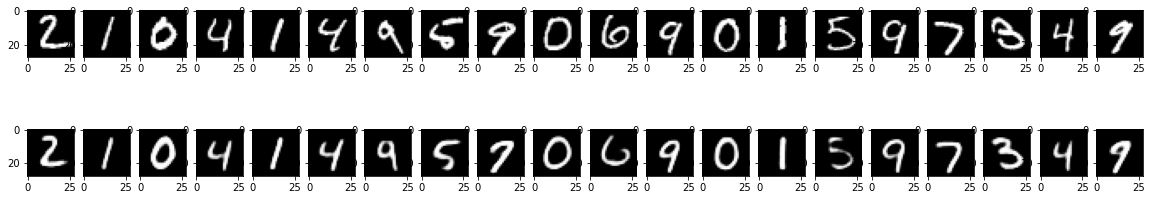

In [ ]:
decodedImages = model.predict(x_test)
n=20
plt.figure(figsize=(20,4))
for i in range(1,n+1):
  ax = plt.subplot(2,n,i)
  plt.imshow(x_test[i].reshape(28,28),cmap="gray")
  ax=plt.subplot(2,n,i+n)
  plt.imshow(decodedImages[i].reshape(28,28),cmap="gray")
plt.show()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 16)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 32)         0   

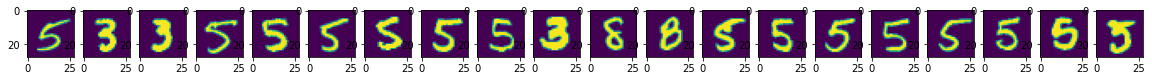

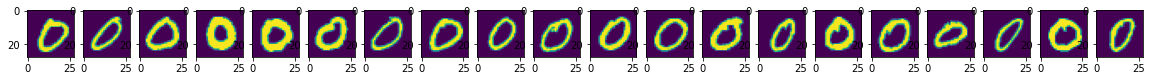

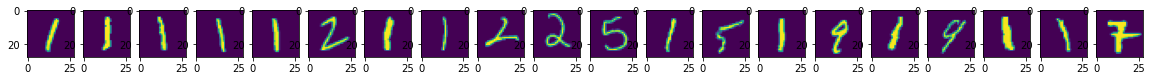

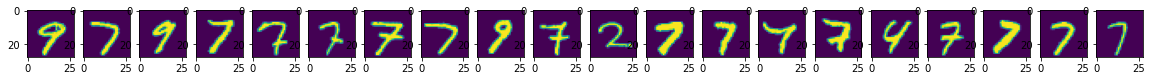

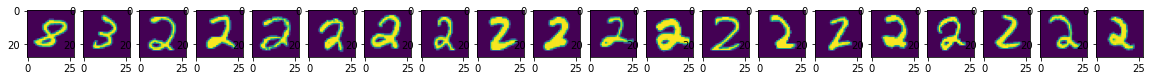

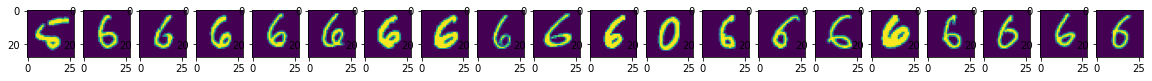

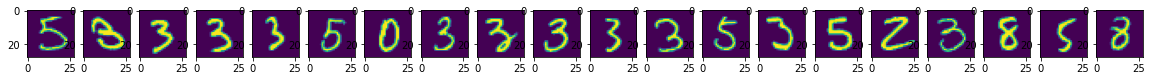

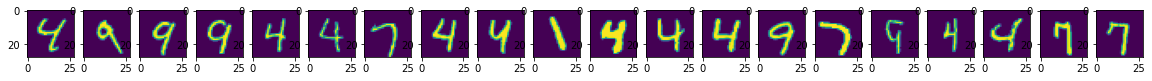

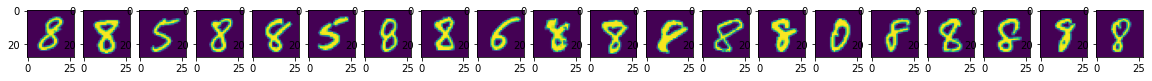

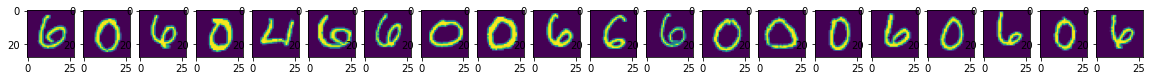

In [ ]:
bestModel = keras.models.load_model("model-020-0.06787111610174179-0.05643049255013466.h5")
PredictionModel = keras.Model(bestModel.layers[0].input,bestModel.layers[15].output)
PredictionModel.summary()
pred = PredictionModel.predict(x_test)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(pred)
kpred = kmeans.predict(pred)

n=20
for i in range(10):
  plt.figure(figsize=(n,4))
  selection = x_test[np.where(kpred==i)]
  for j in range(1, n+1):
    ax = plt.subplot(1,n,j) 
    plt.imshow(selection[j].reshape(28,28))

In [ ]:
inputImg = layers.Input(shape=(28,28,1),name="inputLayer",dtype="float")

x=layers.Conv2D(16,(3,3),activation="relu",padding="same")(inputImg)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(8,(3,3),activation="relu",padding="same")(x)
x=layers.AveragePooling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Flatten()(x)
x=layers.Dense(64,activation="relu")(x)
x=layers.Dropout(0.3)(x)
x=layers.Dense(128,activation="relu")(x)
x=layers.Dropout(0.3)(x)
x=layers.Dense(10,activation="relu")(x)
encoded = layers.Dense(2,activation="sigmoid")(x)
x=layers.Dense(10,activation="relu")(encoded)
x=layers.Dense(128,activation="relu")(x)
x=layers.Dropout(0.3)(x)
x=layers.Dense(64,activation="relu")(x)
x=layers.Dropout(0.3)(x)

x=layers.Dense(392,activation="relu")(x)

x=layers.Reshape((7,7,8))(x)
x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.BatchNormalization()(x)

x=layers.Conv2D(32,(3,3),activation="relu",padding="same")(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.BatchNormalization()(x)

out=layers.Conv2D(1,(3,3),activation="sigmoid",padding="same")(x)

model = keras.Model(inputImg,out)
model.compile(loss="mean_absolute_error",optimizer="adam")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 16)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 32)         0     

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("model-{epoch:03d}-{loss}-{val_loss}.h5",save_best_only=True)
model.fit(x_train,x_train,epochs=20,batch_size=20,validation_split=0.1,callbacks=[checkpoint])

Epoch 1/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0868 - val_loss: 0.0825
Epoch 2/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0869 - val_loss: 0.0820
Epoch 3/20
2700/2700 [==============================] - 27s 10ms/step - loss: 0.0867 - val_loss: 0.0828
Epoch 4/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0866 - val_loss: 0.0819
Epoch 5/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0868 - val_loss: 0.0859
Epoch 6/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0881 - val_loss: 0.0827
Epoch 7/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0867 - val_loss: 0.0834
Epoch 8/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0867 - val_loss: 0.0824
Epoch 9/20
2700/2700 [==============================] - 26s 10ms/step - loss: 0.0865 - val_loss: 0.0828
Epoch 10/20
2700/2700 [==============================] - 26s 10m

In [ ]:
bestModel = keras.models.load_model("model-020-0.08704522252082825-0.0819377601146698.h5")

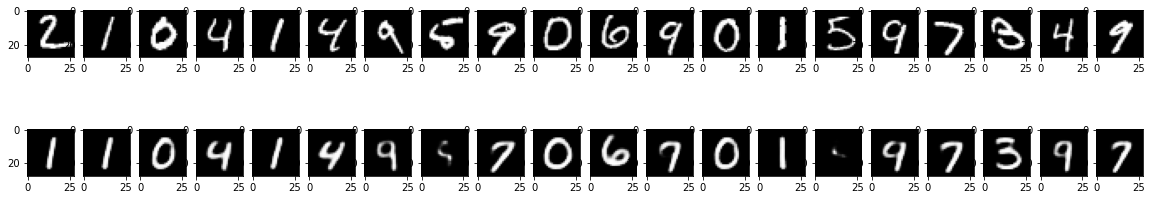

In [ ]:
decodedImages = bestModel.predict(x_test)
n=20
plt.figure(figsize=(20,4))
for i in range(1,n+1):
  ax = plt.subplot(2,n,i)
  plt.imshow(x_test[i].reshape(28,28),cmap="gray")
  ax=plt.subplot(2,n,i+n)
  plt.imshow(decodedImages[i].reshape(28,28),cmap="gray")
plt.show()

In [ ]:
PredictionModel = keras.Model(bestModel.layers[0].input,bestModel.layers[16].output)
PredictionModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (InputLayer)     [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 16)       0         
 ooling2D)                                                       
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 7, 7, 32)         0   

In [ ]:
pred = PredictionModel.predict(x_test)

In [ ]:
pred[0]

array([0.22534253, 0.39933637], dtype=float32)

In [ ]:
pred

array([[0.22534253, 0.39933637],
       [0.01219599, 0.44051382],
       [0.03992771, 0.46575814],
       ...,
       [0.28321555, 0.4474588 ],
       [0.20422389, 0.4492394 ],
       [0.40512386, 0.40260375]], dtype=float32)

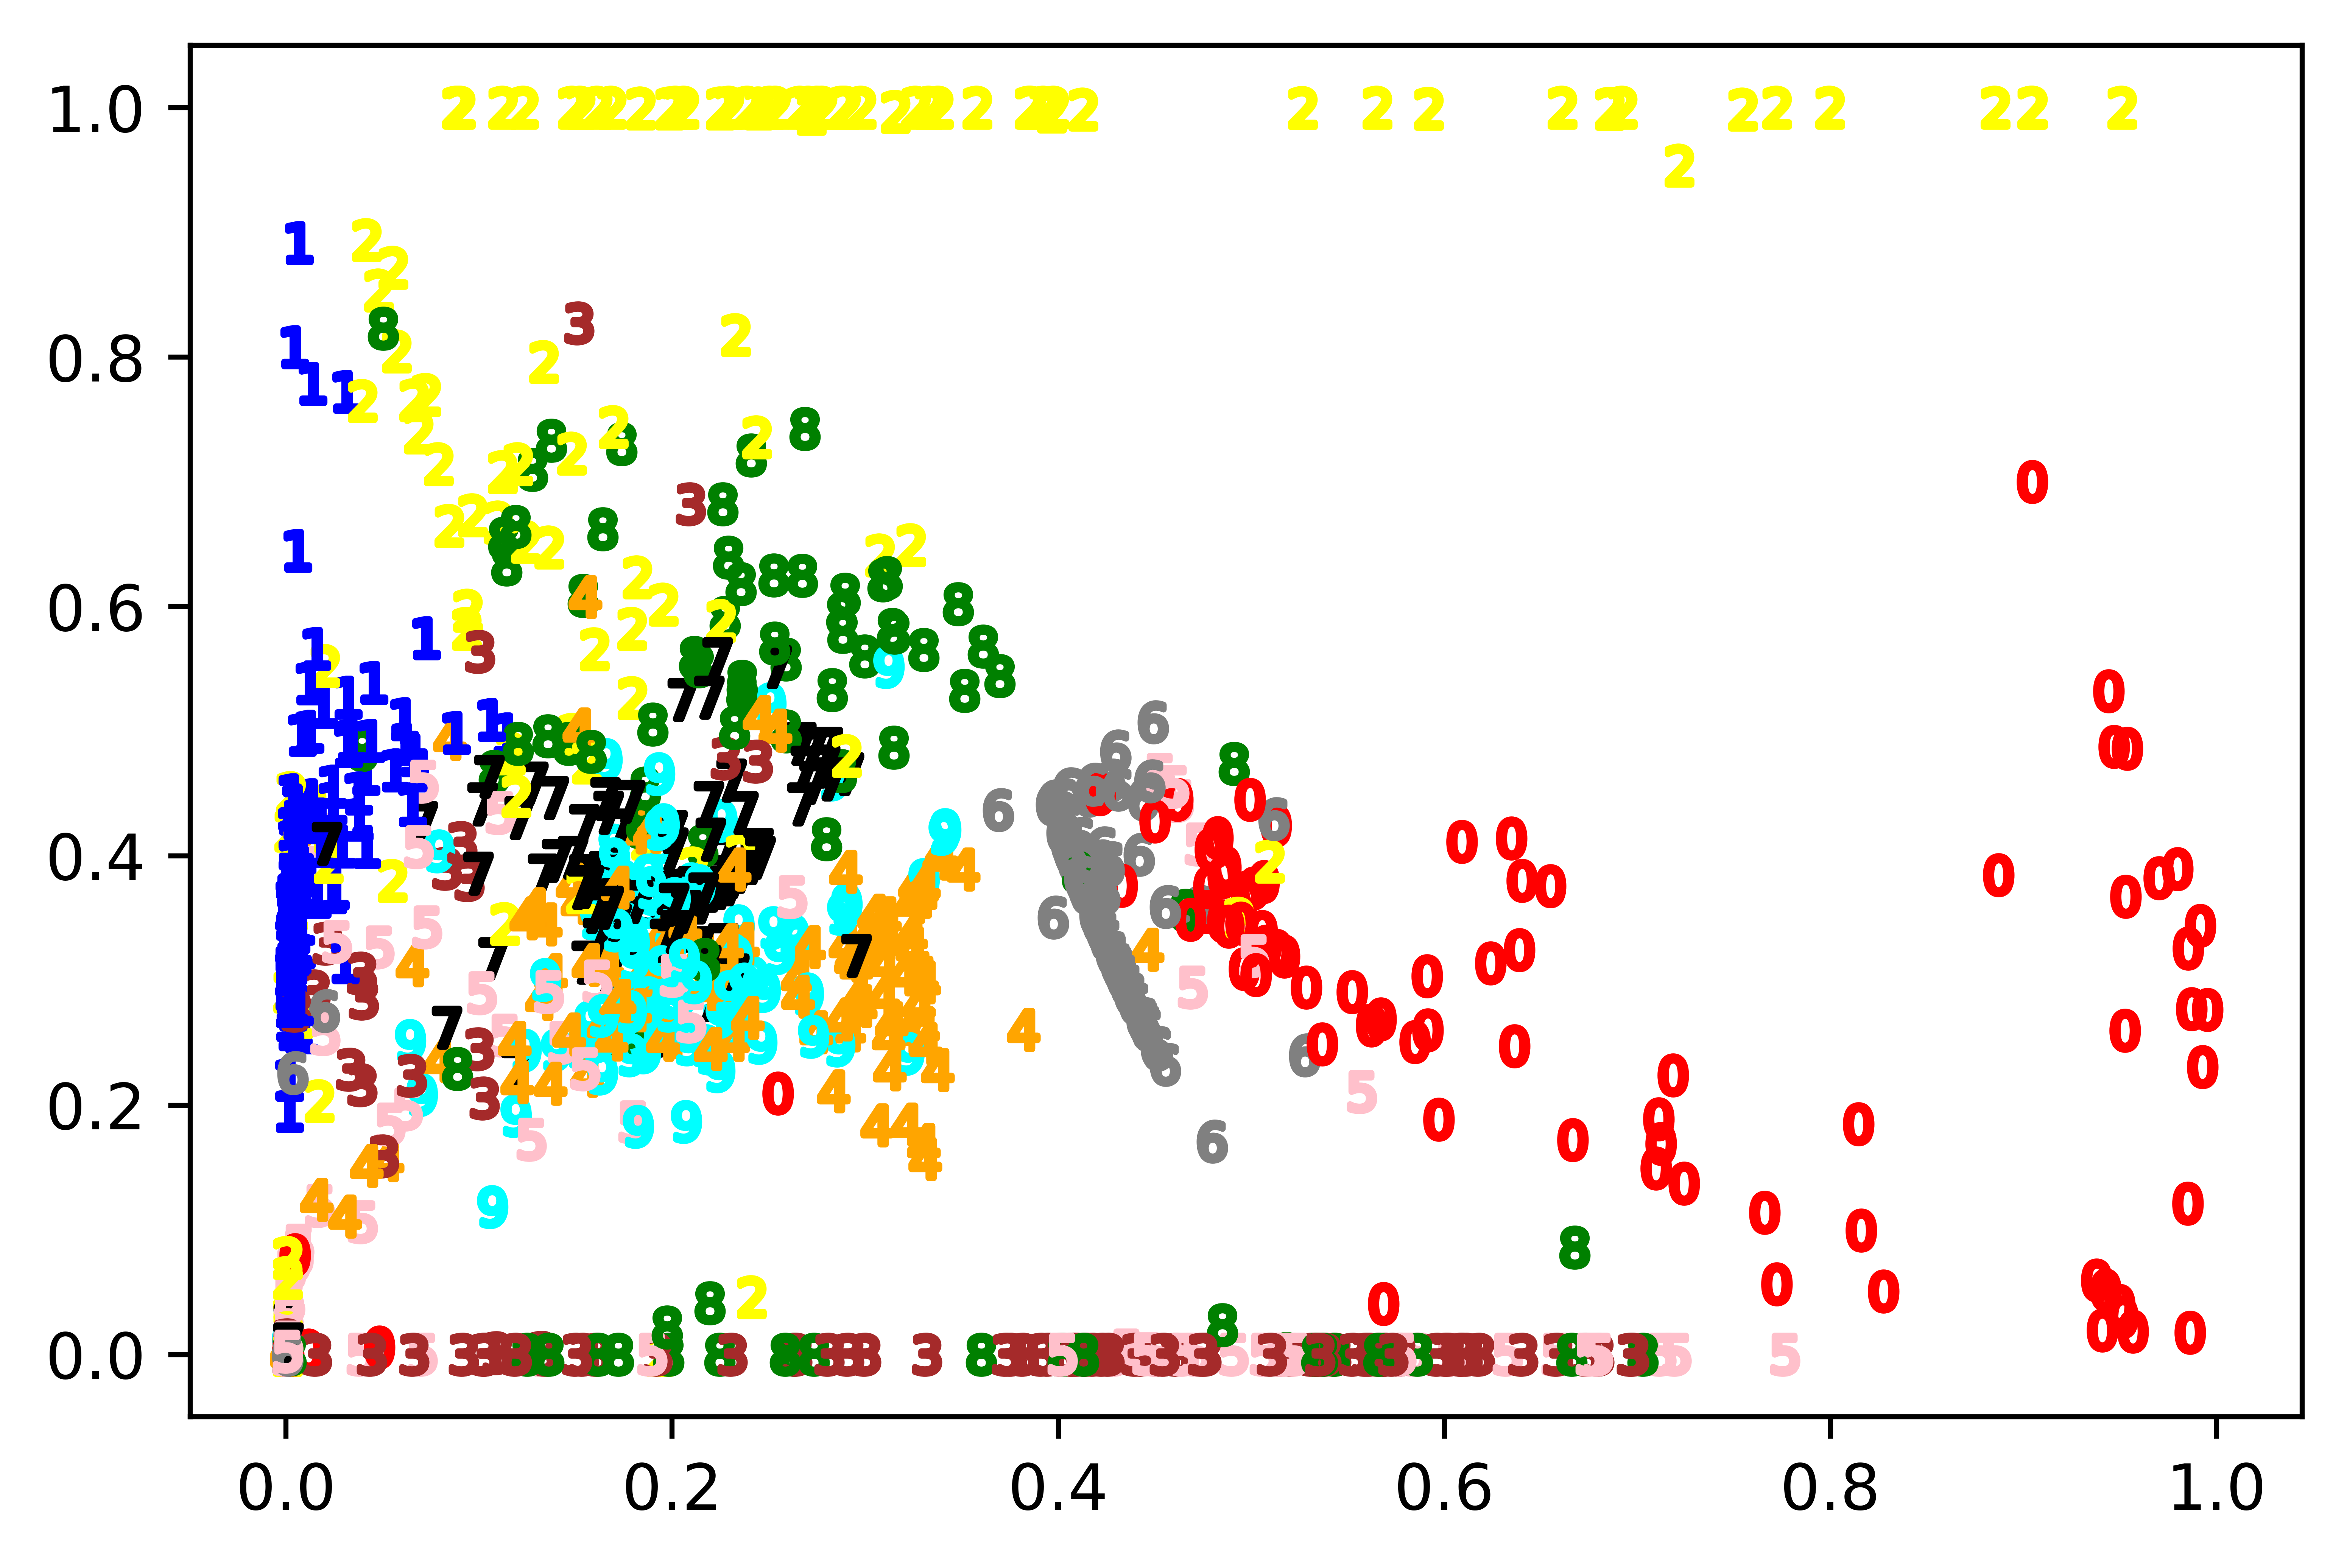

In [ ]:
plt.figure(dpi=1200)
myColors=["red","blue","yellow","brown","orange","pink","gray","black","green","cyan"]
for i in range(1000):
  plt.plot(pred[i,0],pred[i,1],marker="$%d$"%y_test[i],color=myColors[y_test[i]])

In [ ]:
for i in range(1000):
  if(y_test[i]==0):
    if(pred[i,0]<0.3) and (pred[i,0]>0.2):
      print(i)

567


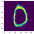

In [ ]:
plt.figure(dpi=10)
plt.imshow(x_test[567].reshape(28,28))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(pred)

KMeans(n_clusters=10)

In [ ]:
kpred = kmeans.predict(pred)

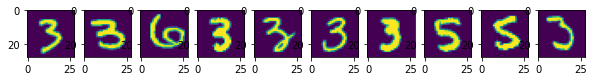

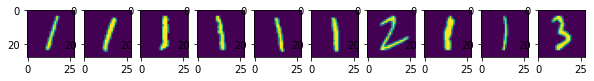

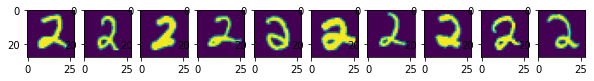

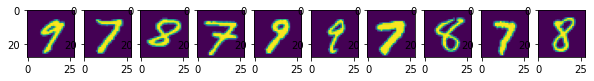

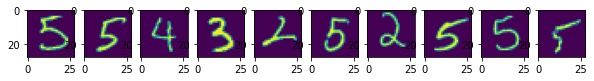

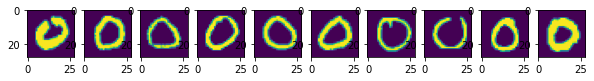

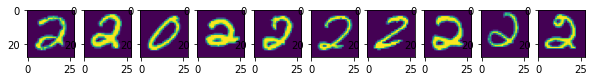

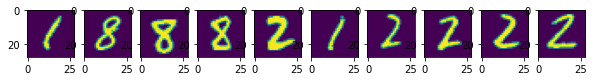

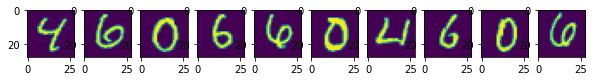

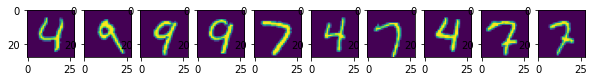

In [ ]:
n=10
for i in range(10):
  plt.figure(figsize=(n,4))
  for j in range(1, n+1):
    ax = plt.subplot(1,n,j)
    selection = x_test[np.where(kpred==i)]
    plt.imshow(selection[j].reshape(28,28))